In [ ]:
# Proximity measures for Nominal Attributes

import pandas as pd
df = pd.read_csv('/content/1. titanic_train.csv')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0
idx1, idx2 = 2, 5
attr1 = set(df.loc[idx1, ['Embarked', 'Cabin']].values)
attr2 = set(df.loc[idx2, ['Embarked', 'Cabin']].values)
jaccard_sim = jaccard_similarity(attr1, attr2)
print(f"Jaccard Similarity between row {idx1} and row {idx2}: {jaccard_sim:.2f}")




Jaccard Similarity between row 2 and row 5: 0.33


In [ ]:
#Proximity measures for Numeric data : Minkowski distance
import pandas as pd
import numpy as np
df = pd.read_csv('/content/1. titanic_train.csv')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))
def manhattan_distance(x1, x2):
  return np.sum(np.abs(x1 - x2))
def supremum_distance(x1, x2):
  return np.max(np.abs(x1 - x2))
idx1, idx2 = 2, 5
attr1 = df.loc[idx1, ['Age', 'Fare']].values
attr2 = df.loc[idx2, ['Age', 'Fare']].values
euclidean_dist = euclidean_distance(attr1, attr2)
manhattan_dist = manhattan_distance(attr1, attr2)
supremum_dist = supremum_distance(attr1, attr2)
print(f"Euclidean Distance between row {idx1} and row {idx2}: {euclidean_dist:.2f}")
print(f"Manhattan Distance between row {idx1} and row {idx2}: {manhattan_dist:.2f}")
print(f"Supremum Distance between row {idx1} and row {idx2}: {supremum_dist:.2f}")

Euclidean Distance between row 2 and row 5: 3.74
Manhattan Distance between row 2 and row 5: 4.23
Supremum Distance between row 2 and row 5: 3.70


In [ ]:
#Proximity measures for Ordinal attributes

import pandas as pd
from scipy.stats import spearmanr
df = pd.read_csv('/content/1. titanic_train.csv')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
def spearman_rank_correlation(x, y):
  return spearmanr(x, y).correlation
idx1, idx2 = 2, 5
attr1 = df.loc[idx1, 'Pclass']
attr2 = df.loc[idx2, 'SibSp']
spearman_corr = spearman_rank_correlation(df['Pclass'], df['SibSp'])
print(f"Spearman Rank Correlation between 'Pclass' and 'SibSp': {spearman_corr:.2f}")


Spearman Rank Correlation between 'Pclass' and 'SibSp': -0.04


In [ ]:
#cosine proximity

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
vector1 = np.array([1, 2, 3, 4, 5])
vector2 = np.array([5, 4, 3, 2, 1])
def cosine_similarity_manual(vec1, vec2):
  dot_product = np.dot(vec1, vec2)
  norm_vec1 = np.linalg.norm(vec1)
  norm_vec2 = np.linalg.norm(vec2)
  return dot_product / (norm_vec1 * norm_vec2)

cos_sim_manual = cosine_similarity_manual(vector1, vector2)
cos_sim_sklearn = cosine_similarity(vector1.reshape(1, -1), vector2.reshape(1, -1))[0][0]
print(f"Cosine Similarity (Manual): {cos_sim_manual:.4f}")
print(f"Cosine Similarity (Sklearn): {cos_sim_sklearn:.4f}")

Cosine Similarity (Manual): 0.6364
Cosine Similarity (Sklearn): 0.6364


Mean of scaled_radius_of_gyration: 174.70971563981044
Median of scaled_radius_of_gyration: 173.5
Mode of scaled_radius_of_gyration: [186.0]
Variance of scaled_radius_of_gyration: 1061.7697275584271
Standard deviation of scaled_radius_of_gyration: 32.58480823264773
Range of scaled_radius_of_gyration: 159.0


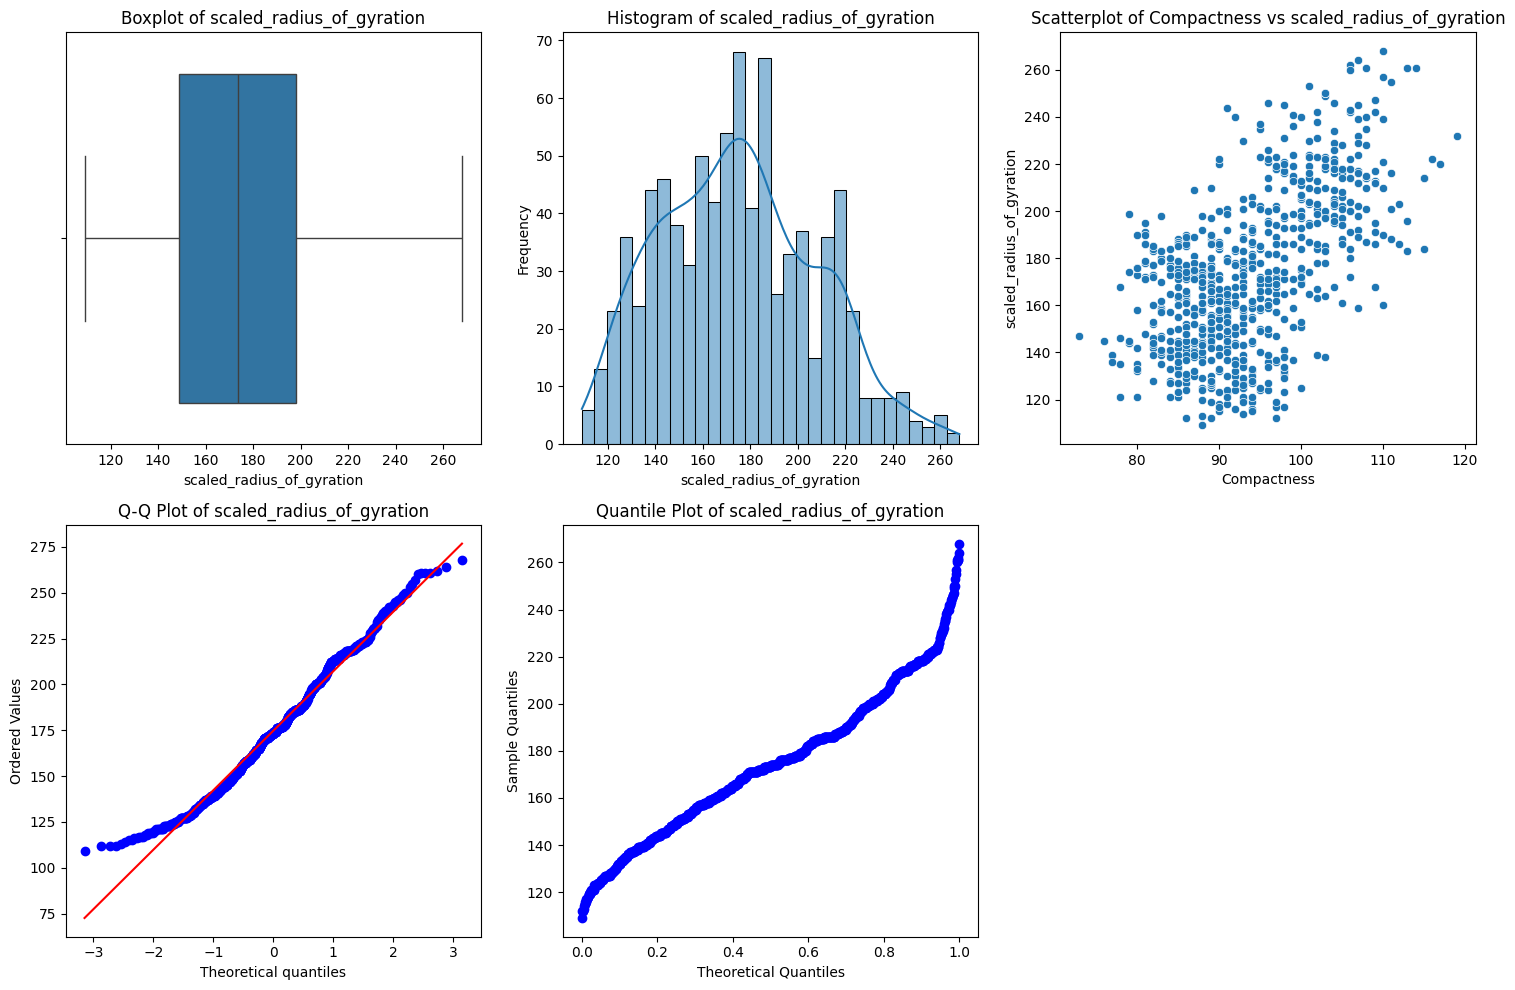

In [ ]:
#Exploratory analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
df = pd.read_csv("/content/vehicle-2.csv")

# Selecting a quantitative attribute for analysis (e.g., scaled_radius_of_gyration)
column_to_analyze = 'scaled_radius_of_gyration'

# Drop rows with missing values in the selected column
df = df.dropna(subset=[column_to_analyze])

# Compute statistics
mean_value = df[column_to_analyze].mean()
median_value = df[column_to_analyze].median()
mode_value = df[column_to_analyze].mode().tolist()  # Get mode as a list
variance_value = df[column_to_analyze].var()
std_deviation_value = df[column_to_analyze].std()
range_value = df[column_to_analyze].max() - df[column_to_analyze].min()

# Print results
print(f"Mean of {column_to_analyze}: {mean_value}")
print(f"Median of {column_to_analyze}: {median_value}")
print(f"Mode of {column_to_analyze}: {mode_value}")
print(f"Variance of {column_to_analyze}: {variance_value}")
print(f"Standard deviation of {column_to_analyze}: {std_deviation_value}")
print(f"Range of {column_to_analyze}: {range_value}")

# Visualization
plt.figure(figsize=(15, 10))  # Increase the figure size for better readability

# Boxplot
plt.subplot(2, 3, 1)
sns.boxplot(x=df[column_to_analyze])
plt.title(f'Boxplot of {column_to_analyze}')

# Histogram
plt.subplot(2, 3, 2)
sns.histplot(df[column_to_analyze], kde=True, bins=30)
plt.title(f'Histogram of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')

# Scatterplot (e.g., scaled_radius_of_gyration vs compactness)
if 'compactness' in df.columns:  # Check if 'compactness' exists in the dataset
    plt.subplot(2, 3, 3)
    sns.scatterplot(x=df['compactness'], y=df[column_to_analyze])
    plt.title(f'Scatterplot of Compactness vs {column_to_analyze}')
    plt.xlabel('Compactness')
    plt.ylabel(column_to_analyze)

# Q-Q Plot
plt.subplot(2, 3, 4)
stats.probplot(df[column_to_analyze], plot=plt)
plt.title(f'Q-Q Plot of {column_to_analyze}')

# Quantile Plot
plt.subplot(2, 3, 5)
quantiles = np.linspace(0, 1, len(df[column_to_analyze]))
sample_quantiles = np.percentile(df[column_to_analyze], 100 * quantiles)
plt.plot(quantiles, sample_quantiles, marker='o', linestyle='--', color='b')
plt.title(f'Quantile Plot of {column_to_analyze}')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Adjust layout and show plots
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


In [ ]:
# Data Cleaning
import pandas as pd
from sklearn.impute import KNNImputer

# Load dataset
df = pd.read_csv('/content/diabetes.csv')

# Ensure all relevant columns are numeric
df['Pregnancies'] = pd.to_numeric(df['Pregnancies'], errors='coerce')
df['Glucose'] = pd.to_numeric(df['Glucose'], errors='coerce')
df['BloodPressure'] = pd.to_numeric(df['BloodPressure'], errors='coerce')
df['SkinThickness'] = pd.to_numeric(df['SkinThickness'], errors='coerce')
df['Insulin'] = pd.to_numeric(df['Insulin'], errors='coerce')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['DiabetesPedigreeFunction'] = pd.to_numeric(df['DiabetesPedigreeFunction'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Calculate statistics for imputations
mean_values = df.mean()  # Mean for each column
median_values = df.median()  # Median for each column
mode_values = df.mode().iloc[0]  # Mode for each column (first row of mode DataFrame)

# Fill missing values with constants, mean, median, or mode
df.fillna(0).to_csv('pima_with_constant.csv', index=False)
df.fillna(mean_values).to_csv('pima_with_mean.csv', index=False)
df.fillna(median_values).to_csv('pima_with_median.csv', index=False)
df.fillna(mode_values).to_csv('pima_with_mode.csv', index=False)

print("Data with missing values replaced using constant, mean, median, and mode saved to files.")

# Load a dataset with missing values for KNN Imputation
df_knn = pd.read_csv('/content/diabetes.csv')

# Ensure all relevant columns are numeric for KNN imputation
df_knn['Pregnancies'] = pd.to_numeric(df_knn['Pregnancies'], errors='coerce')
df_knn['Glucose'] = pd.to_numeric(df_knn['Glucose'], errors='coerce')
df_knn['BloodPressure'] = pd.to_numeric(df_knn['BloodPressure'], errors='coerce')
df_knn['SkinThickness'] = pd.to_numeric(df_knn['SkinThickness'], errors='coerce')
df_knn['Insulin'] = pd.to_numeric(df_knn['Insulin'], errors='coerce')
df_knn['BMI'] = pd.to_numeric(df_knn['BMI'], errors='coerce')
df_knn['DiabetesPedigreeFunction'] = pd.to_numeric(df_knn['DiabetesPedigreeFunction'], errors='coerce')
df_knn['Age'] = pd.to_numeric(df_knn['Age'], errors='coerce')

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)  # Use 3 nearest neighbors
columns_to_impute = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_knn[columns_to_impute] = imputer.fit_transform(df_knn[columns_to_impute])

# Save the dataset after KNN Imputation
df_knn.to_csv('pima_with_knn_imputed.csv', index=False)

print("Missing values imputed using KNN and saved to 'pima_with_knn_imputed.csv'.")

Data with missing values replaced using constant, mean, median, and mode saved to files.
Missing values imputed using KNN and saved to 'pima_with_knn_imputed.csv'.


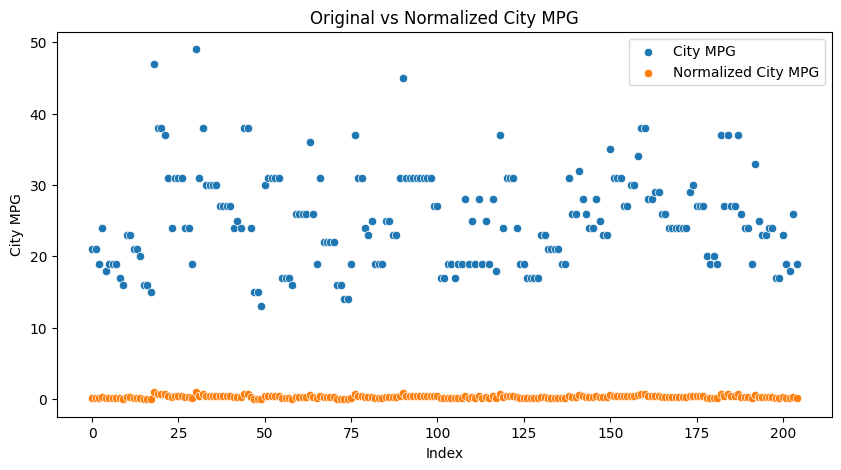

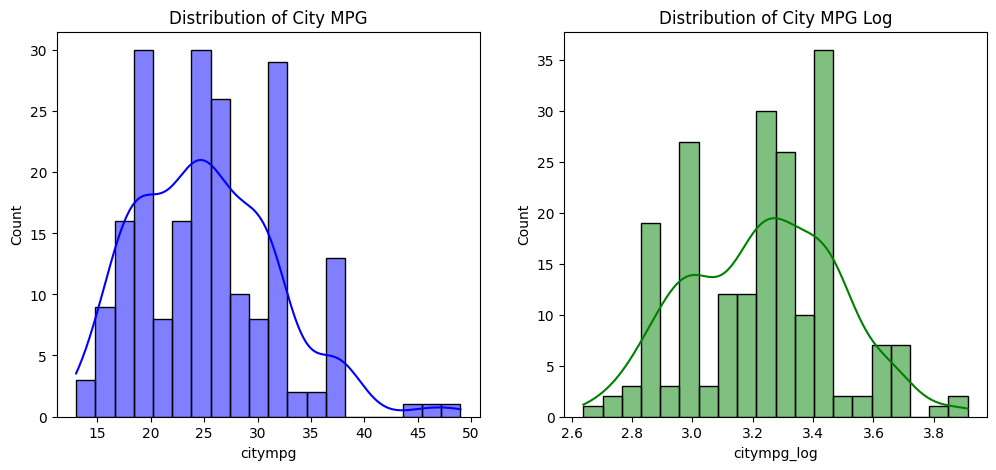

   citympg  citympg_normalized  citympg_price_interaction  citympg_log
0       21            0.222222                   283395.0     3.091042
1       21            0.222222                   346500.0     3.091042
2       19            0.166667                   313500.0     2.995732
3       24            0.305556                   334800.0     3.218876
4       18            0.138889                   314100.0     2.944439


In [ ]:
#Data Transformation

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
df = pd.read_csv("/content/CarPrice_Assignment.csv")

# Normalization
scaler = MinMaxScaler()
df["citympg_normalized"] = scaler.fit_transform(df[["citympg"]])

# Plot Original vs Normalized
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y="citympg", data=df, label="City MPG")
sns.scatterplot(x=df.index, y="citympg_normalized", data=df, label="Normalized City MPG")
plt.title("Original vs Normalized City MPG")
plt.xlabel("Index")
plt.ylabel("City MPG")
plt.legend()
plt.show()

# Feature Creation
df["citympg_price_interaction"] = df["citympg"] * df["price"]

# Log Transformation
df["citympg_log"] = np.log1p(df["citympg"])

# Plot Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["citympg"], bins=20, kde=True, color='blue')
plt.title("Distribution of City MPG")
plt.subplot(1, 2, 2)
sns.histplot(df["citympg_log"], bins=20, kde=True, color='green')
plt.title("Distribution of City MPG Log")
plt.show()

print(df[["citympg", "citympg_normalized","citympg_price_interaction", "citympg_log"]].head())

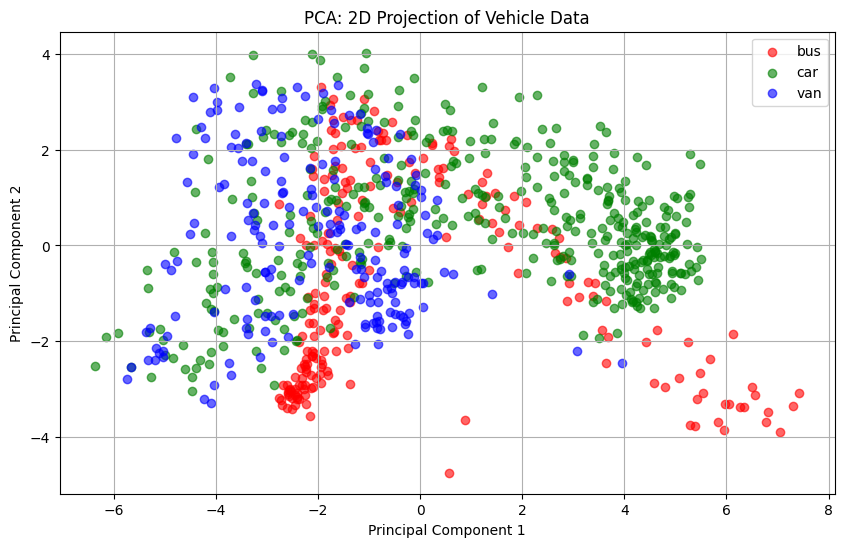

In [ ]:
#PCA

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv("/content/vehicle-2.csv")
numeric_data = data.select_dtypes(include=[np.number])
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())
features = data.drop(columns=["class"])
vehicle_classes = data["class"].values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

unique_classes = np.unique(vehicle_classes)
colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
for i, vehicle_class in enumerate(unique_classes):
    mask = vehicle_classes == vehicle_class
    class_data = reduced_data[mask]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=vehicle_class, c=colors[i % len(colors)], alpha=0.6)

plt.title("PCA: 2D Projection of Vehicle Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

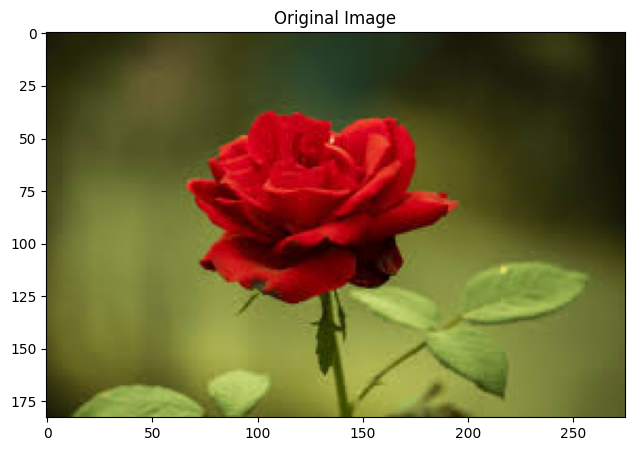

4it [00:02,  1.91it/s]


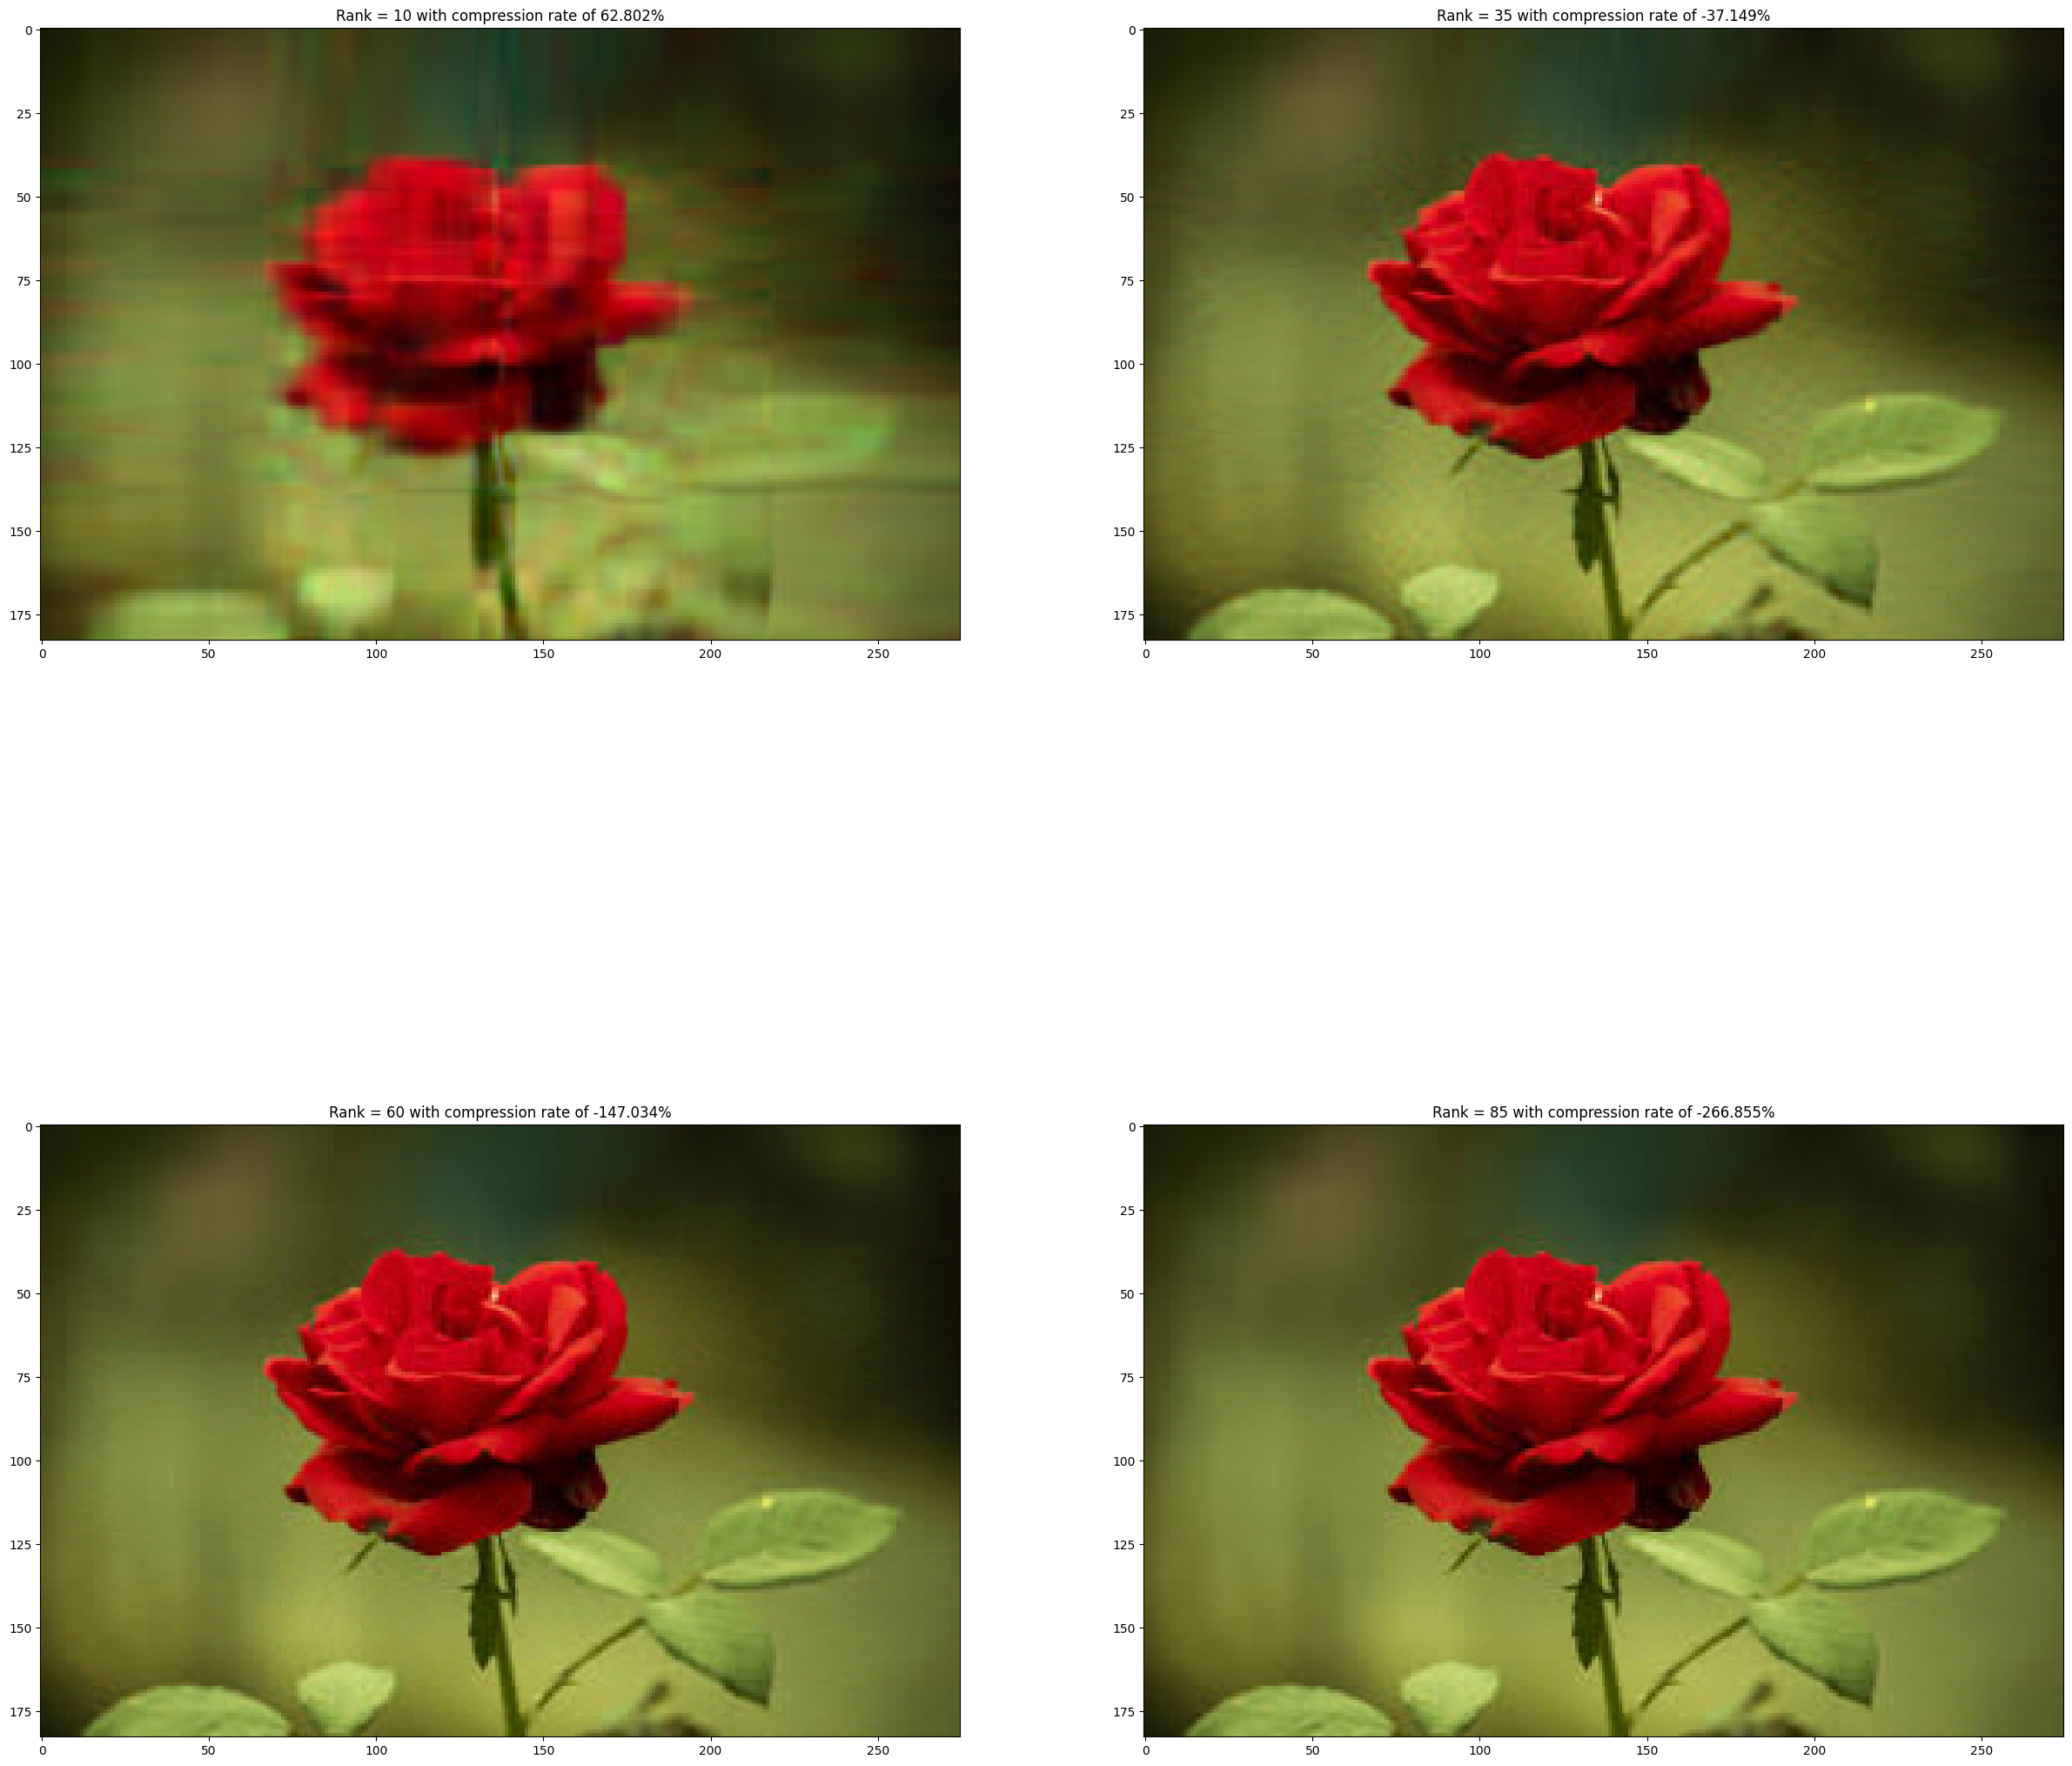

In [ ]:
#SVD

from matplotlib import pyplot as plt
from jax import numpy as jnp
import tqdm

def stack(matrices):
    return jnp.dstack(matrices)

def SVD(matrices, rank):
    approx_matrices, memory_sizes = [], []

    for matrix in matrices:
        U, S, Vt = jnp.linalg.svd(matrix, full_matrices=False)
        S = jnp.diag(S[:rank])
        truncated_U, truncated_V = U[:, :rank], Vt[:rank, :]

        memory_sizes.append(truncated_U.nbytes + S.nbytes + truncated_V.nbytes)
        approx_matrices.append(truncated_U @ S @ truncated_V)

    total_size = sum(memory_sizes)
    return stack(approx_matrices), total_size

# Load and visualize original image
img = plt.imread('/content/download.jpg')
original_img_size = img.nbytes

plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.title('Original Image')
plt.show()

# Separate RGB channels
img_red, img_green, img_blue = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# Rank values for SVD approximation
ranks = range(10, 100, 25)

# Plot approximations
fig, axs = plt.subplots(2, 2, figsize=(30, 30))

for idx, r in tqdm.tqdm(enumerate(ranks)):
    approx_img, memory_size = SVD([img_red, img_green, img_blue], rank=r)
    approx_img = jnp.array(approx_img, dtype=jnp.uint8)
    compression_percentage = ((original_img_size - memory_size) / original_img_size) * 100

    x, y = idx % 2, idx // 2
    axs[y, x].imshow(approx_img)
    axs[y, x].set_title(f'Rank = {r} with compression rate of {round(compression_percentage, 3)}%')

plt.show()

Accuracy: 0.80


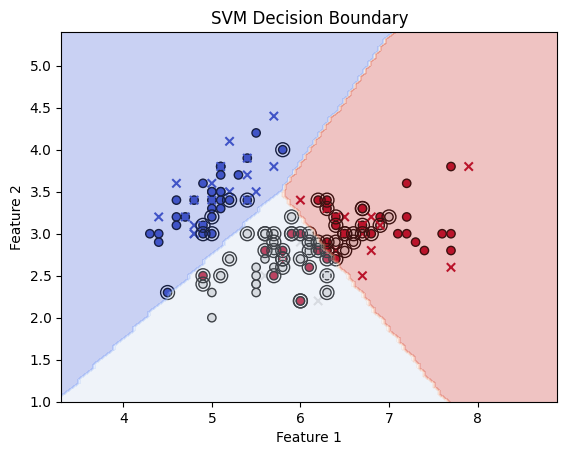

In [ ]:
#SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100), np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

Accuracy: 0.72


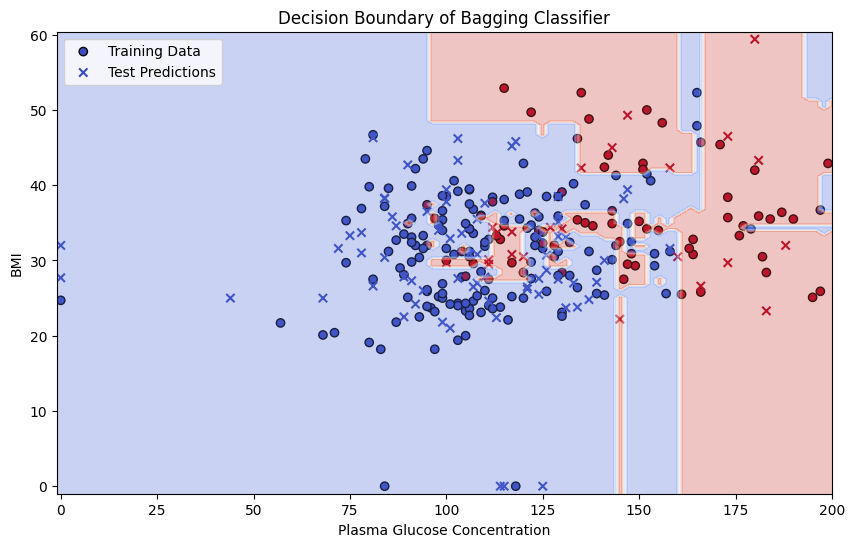

In [ ]:
#Bagging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the numeric columns
numeric_columns = [
    "NoOfPregency", "PlasmaGlucoseCon", "BloodPressure",
    "SkinFoldThickness", "Insuline", "BMI", "DiabetesPedigree", "Age"
]

# Load the dataset
data = pd.read_csv("/content/3. pima_Missing_values.csv")
data.replace("<null>", np.nan, inplace=True)
data[numeric_columns] = data[numeric_columns].astype(float)
data["Class"] = data["Class"].map({"tested_positive": 1, "tested_negative": 0})
data.dropna(inplace=True)

# Use only two features for visualization
X = data[["PlasmaGlucoseCon", "BMI"]]
y = data["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Bagging classifier
bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualization of decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_train["PlasmaGlucoseCon"], X_train["BMI"], c=y_train, cmap='coolwarm', edgecolor='k', label='Training Data')
plt.scatter(X_test["PlasmaGlucoseCon"], X_test["BMI"], c=y_pred, cmap='coolwarm', marker='x', label='Test Predictions')

xx, yy = np.meshgrid(np.linspace(X["PlasmaGlucoseCon"].min()-1, X["PlasmaGlucoseCon"].max()+1, 100),
                     np.linspace(X["BMI"].min()-1, X["BMI"].max()+1, 100))
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["PlasmaGlucoseCon", "BMI"])
Z = bagging_model.predict(grid_points).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Plasma Glucose Concentration')
plt.ylabel('BMI')
plt.title('Decision Boundary of Bagging Classifier')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.77


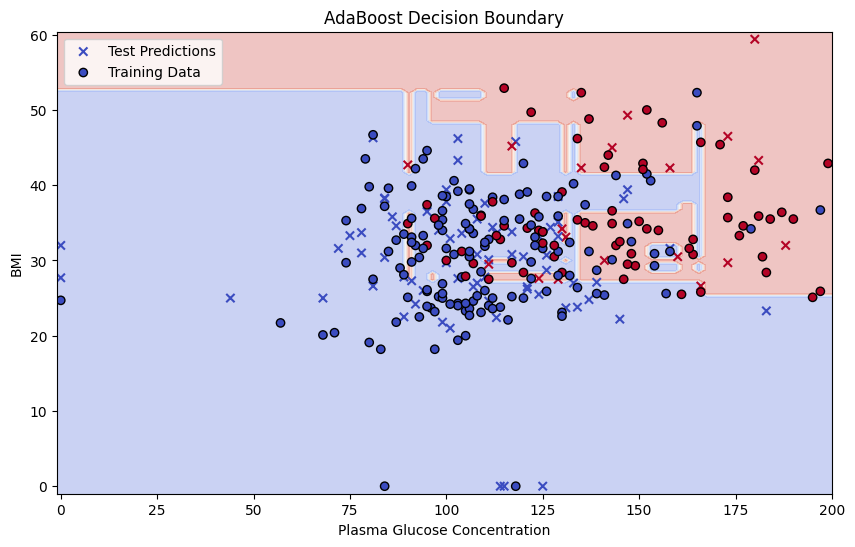

In [ ]:
#Boosting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess dataset
data = pd.read_csv("/content/3. pima_Missing_values.csv").replace("<null>", np.nan).dropna()
data["Class"] = data["Class"].map({"tested_positive": 1, "tested_negative": 0})
X, y = data[["PlasmaGlucoseCon", "BMI"]].astype(float), data["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Evaluate and visualize
print(f"Accuracy: {accuracy_score(y_test, model.predict(X_test)):.2f}")
xx, yy = np.meshgrid(
    np.linspace(X["PlasmaGlucoseCon"].min()-1, X["PlasmaGlucoseCon"].max()+1, 100),
    np.linspace(X["BMI"].min()-1, X["BMI"].max()+1, 100)
)
Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["PlasmaGlucoseCon", "BMI"])).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test["PlasmaGlucoseCon"], X_test["BMI"], c=model.predict(X_test), cmap='coolwarm', marker='x', label='Test Predictions')
plt.scatter(X_train["PlasmaGlucoseCon"], X_train["BMI"], c=y_train, cmap='coolwarm', edgecolor='k', label='Training Data')
plt.xlabel('Plasma Glucose Concentration')
plt.ylabel('BMI')
plt.legend()
plt.title('AdaBoost Decision Boundary')
plt.show()

In [ ]:
#Apriori - generate Frequent item sets


import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data = pd.read_csv("/content/GroceryStoreDataSet.csv", header=None, names=["Items"])
transactions = data["Items"].str.split(",")
unique_items = sorted(set(item.strip() for sublist in transactions for item in sublist))
one_hot_df = pd.DataFrame([{item: (item in transaction) for item in unique_items} for transaction in transactions])

frequent_itemsets = apriori(one_hot_df, min_support=0.2, use_colnames=True)
num=len(frequent_itemsets)
rules = association_rules(frequent_itemsets,num, metric="confidence", min_threshold=0.6)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
    support              itemsets
0      0.35             (BISCUIT)
1      0.20           (BOURNVITA)
2      0.65               (BREAD)
3      0.40              (COFFEE)
4      0.30          (CORNFLAKES)
5      0.25               (MAGGI)
6      0.25                (MILK)
7      0.30               (SUGER)
8      0.35                 (TEA)
9      0.20      (BREAD, BISCUIT)
10     0.20         (BREAD, MILK)
11     0.20        (BREAD, SUGER)
12     0.20          (BREAD, TEA)
13     0.20  (COFFEE, CORNFLAKES)
14     0.20       (COFFEE, SUGER)
15     0.20          (TEA, MAGGI)

Association Rules:
    antecedents consequents  support  confidence      lift
0        (MILK)     (BREAD)      0.2    0.800000  1.230769
1       (SUGER)     (BREAD)      0.2    0.666667  1.025641
2  (CORNFLAKES)    (COFFEE)      0.2    0.666667  1.666667
3       (SUGER)    (COFFEE)      0.2    0.666667  1.666667
4       (MAGGI)       (TEA)      0.2    0.800000  2.285714


In [ ]:
#FP growth Algorithm to generate Frequentb item sets


import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

data = pd.read_csv("GroceryStoreDataSet.csv", header=None, names=["Items"])
transactions = data["Items"].str.split(",")
unique_items = sorted(set(item.strip() for sublist in transactions for item in sublist))
one_hot_df = pd.DataFrame([{item: (item in transaction) for item in unique_items} for transaction in transactions])

frequent_itemsets = fpgrowth(one_hot_df, min_support=0.2, use_colnames=True)
num=len(frequent_itemsets)
rules = association_rules(frequent_itemsets,num, metric="confidence", min_threshold=0.6)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets:
    support              itemsets
0      0.65               (BREAD)
1      0.35             (BISCUIT)
2      0.25                (MILK)
3      0.30          (CORNFLAKES)
4      0.35                 (TEA)
5      0.20           (BOURNVITA)
6      0.25               (MAGGI)
7      0.40              (COFFEE)
8      0.30               (SUGER)
9      0.20      (BREAD, BISCUIT)
10     0.20         (BREAD, MILK)
11     0.20  (COFFEE, CORNFLAKES)
12     0.20          (BREAD, TEA)
13     0.20          (TEA, MAGGI)
14     0.20       (COFFEE, SUGER)
15     0.20        (BREAD, SUGER)

Association Rules:
    antecedents consequents  support  confidence      lift
0        (MILK)     (BREAD)      0.2    0.800000  1.230769
1  (CORNFLAKES)    (COFFEE)      0.2    0.666667  1.666667
2       (MAGGI)       (TEA)      0.2    0.800000  2.285714
3       (SUGER)    (COFFEE)      0.2    0.666667  1.666667
4       (SUGER)     (BREAD)      0.2    0.666667  1.025641


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


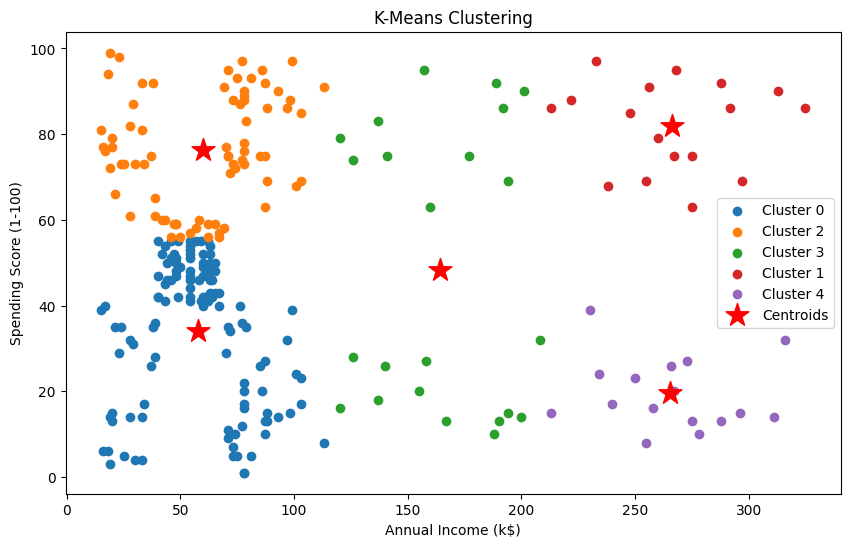

In [ ]:
#K means

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
for cluster_id in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_id}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


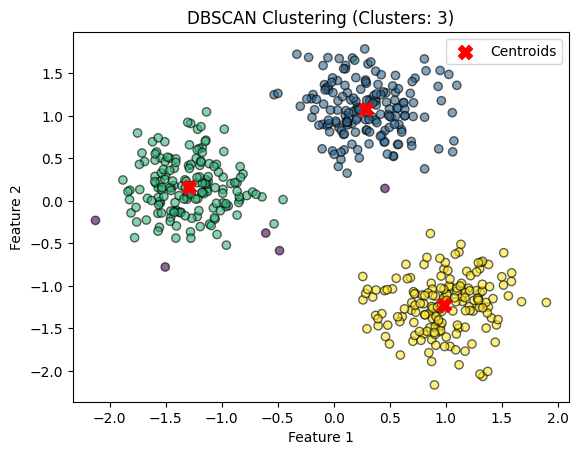

In [ ]:
#DBscan

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.5, random_state=0)
X = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

unique_labels = set(labels)
centroids = []
for label in unique_labels:
    if label != -1:
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        centroids.append(centroid)
centroids = np.array(centroids)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.6)
if len(centroids) > 0:
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title(f"DBSCAN Clustering (Clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


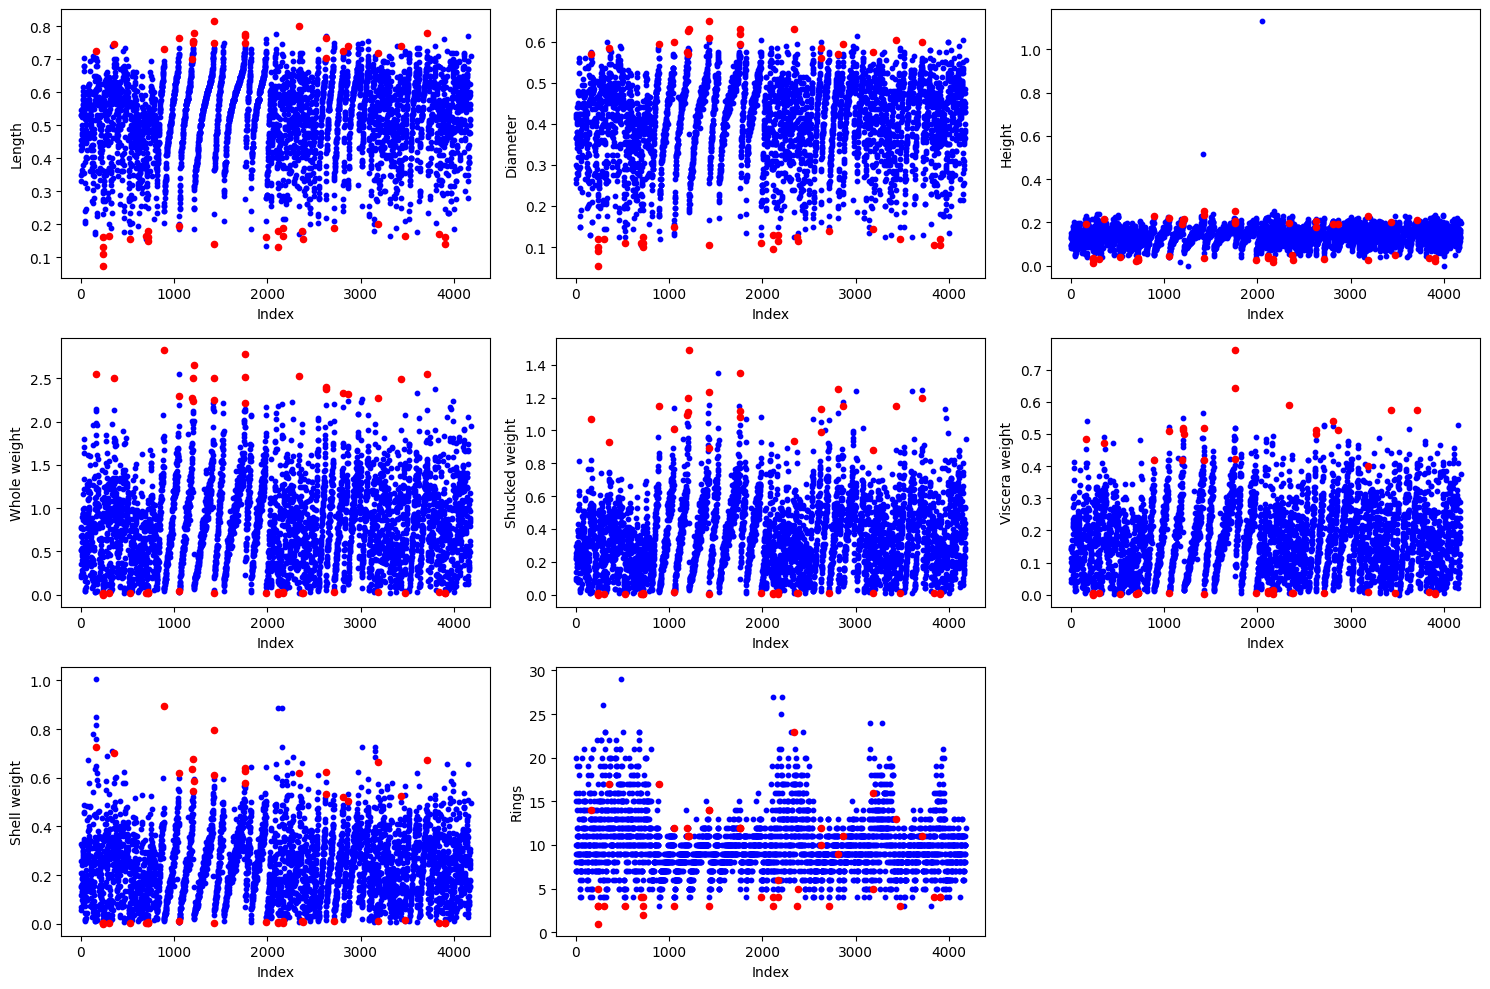

In [ ]:
#Outlier Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("/content/abalone.csv")
df = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
         'Viscera weight', 'Shell weight', 'Rings']]

def detect_outliers(df, features):
    outlier_indices = []
    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        lower_range = Q1 - outlier_step
        upper_range = Q3 + outlier_step
        outlier_list_col = df[(df[c] < lower_range) | (df[c] > upper_range)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

outliers_iqr = detect_outliers(df, df.columns)

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    plt.scatter(df.index, df[col], color="blue", s=10)
    plt.scatter(outliers_iqr, df.loc[outliers_iqr, col], color="red", s=20)
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.tight_layout()
plt.show()